In [3]:
!pip install datasets matplotlib pandas nltk --quiet

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
dataset = load_dataset("heegyu/toxic-spans")

In [6]:
def calculate_word_span_percentage(dataset_split):
    examples = []
    for i, example in enumerate(dataset_split):
        text_of_post = example["text_of_post"]
        toxic_spans_dict = eval(example["text"])
        toxic_spans = list(toxic_spans_dict.keys())

        sentence_words = word_tokenize(text_of_post)
        span_words = [word for span in toxic_spans for word in word_tokenize(span)]

        span_word_count = len(span_words)
        total_word_count = len(sentence_words)

        if total_word_count > 0:
            span_percentage = (span_word_count / total_word_count) * 100
        else:
            span_percentage = 0

        examples.append({
            "sentence": text_of_post,
            "spans": toxic_spans,
            "span_word_count": span_word_count,
            "total_word_count": total_word_count,
            "span_percentage": span_percentage
        })
    return pd.DataFrame(examples)

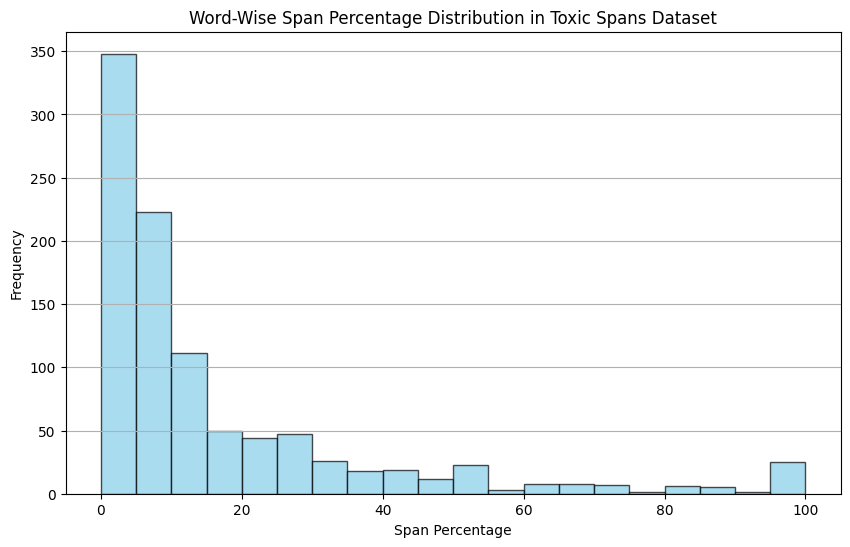

Average Word-Wise Span Percentage: 17.93%
Results saved to 'toxic_spans_wordwise_analysis.csv'


In [7]:
test_split = dataset["test"]
span_data = calculate_word_span_percentage(test_split)

plt.figure(figsize=(10, 6))
plt.hist(span_data["span_percentage"], bins=20, range=(0, 100), alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Word-Wise Span Percentage Distribution in Toxic Spans Dataset")
plt.xlabel("Span Percentage")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

average_span_percentage = span_data["span_percentage"].mean()
print(f"Average Word-Wise Span Percentage: {average_span_percentage:.2f}%")

span_data.to_csv("toxic_spans_wordwise_analysis.csv", index=False)
print("Results saved to 'toxic_spans_wordwise_analysis.csv'")